In [1]:
from Bio import SeqIO
import pandas as pd

In [1]:
# Import the necessary libraries
from Bio import SeqIO
import pandas as pd
import warnings

# Ignore warning messages
warnings.filterwarnings('ignore')

count = 0

records = {'seq_id': [],
           'seq': [],
           'quality_scores': [],
           'type': []}

# Create the dataframe
df = pd.DataFrame(records)

# Open the FASTQ file
with open('ERR4796171.fastq', 'r') as f:
    # Parse the FASTQ file and create a list of dictionaries with the data
    # records = [{'seq_id': record.id,
    #            'seq': str(record.seq),
    #            'quality_scores': record.letter_annotations['phred_quality'],
    #            'type': record.description.split(':')[3]}
    #            for record in SeqIO.parse(f, 'fastq')]

    for record in SeqIO.parse(f, 'fastq'):
        if count < 10000:
            '''records = [{'seq_id': record.id,
                       'seq': str(record.seq),
                       'quality_scores': record.letter_annotations['phred_quality'],
                       'type': record.description.split(':')[3]}]'''
            new_row = {'seq_id': record.id, 'seq': str(record.seq), 'quality_scores': record.letter_annotations['phred_quality'], 'type': record.description.split(':')[3] }
            df = df.append(new_row, ignore_index=True)
            count += 1
        else:
            break

# Create a pandas DataFrame from the list of dictionaries
# df = pd.DataFrame(records)

# Print the DataFrame
print(df.head())
print(len(df))

         seq_id                                                seq  \
0  ERR4796171.1  CAGGAACAGCAAAGGAAATCCGGCAAATTTGCGCAGTCATTCTCAA...   
1  ERR4796171.2  TGGTGAATGATACCCGGTGCTGGCAATCTCGTTTAAACTACATGCA...   
2  ERR4796171.3  CCACAGCATCAAGACCCTGTGACCTCTCAAAGGCCCGGTGGAAAGG...   
3  ERR4796171.4  CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...   
4  ERR4796171.5  CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...   

                                      quality_scores type  
0  [32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...    2  
1  [32, 32, 32, 32, 32, 36, 36, 36, 14, 32, 36, 2...    1  
2  [32, 14, 32, 32, 32, 36, 14, 36, 36, 36, 32, 3...    4  
3  [32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...    3  
4  [32, 32, 21, 32, 32, 36, 32, 36, 36, 36, 36, 3...    4  
10000


In [2]:
a_c=lambda x: str(x).count('C')
df['C'] = df['seq'].apply(a_c)

a_g=lambda x: str(x).count('G')
df['G'] = df['seq'].apply(a_g)

a_t=lambda x: str(x).count('T')
df['T'] =df['seq'].apply(a_t)

a_a=lambda x: str(x).count('A')
df['A'] = df['seq'].apply(a_a)

In [5]:
import statistics
df['avg'] = [round(statistics.mean(col), 2) for col in df['quality_scores']]

In [20]:
df['id'] = df['seq_id'].str.split('.').str[1]

In [26]:
df.head()

,seq_id,seq,quality_scores,type,C,G,T,A,avg,id
0,ERR4796171.1,CAGGAACAGCAAAGGAAATCCGGCAAATTTGCGCAGTCATTCTCAA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",2,20,17,12,26,35.73,1
1,ERR4796171.2,TGGTGAATGATACCCGGTGCTGGCAATCTCGTTTAAACTACATGCA...,"[32, 32, 32, 32, 32, 36, 36, 36, 14, 32, 36, 2...",1,16,19,17,24,33.91,2
2,ERR4796171.3,CCACAGCATCAAGACCCTGTGACCTCTCAAAGGCCCGGTGGAAAGG...,"[32, 14, 32, 32, 32, 36, 14, 36, 36, 36, 32, 3...",4,21,22,9,22,31.20,3
3,ERR4796171.4,CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",3,22,20,10,24,35.68,4
4,ERR4796171.5,CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...,"[32, 32, 21, 32, 32, 36, 32, 36, 36, 36, 36, 3...",4,21,20,10,23,33.78,5


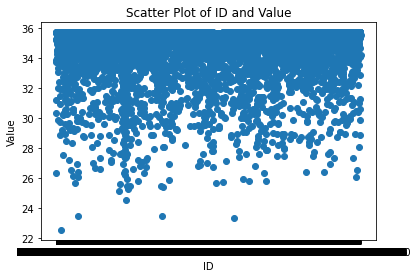

In [8]:
import matplotlib.pyplot as plt

# Sample data
ids = df.seq_id
values = df.avg

# Create a scatter plot
plt.scatter(ids, values)

# Set the x-axis and y-axis labels
plt.xlabel("ID")
plt.ylabel("Value")

# Set the title of the plot
plt.title("Scatter Plot of ID and Value")

# Show the plot
plt.show()


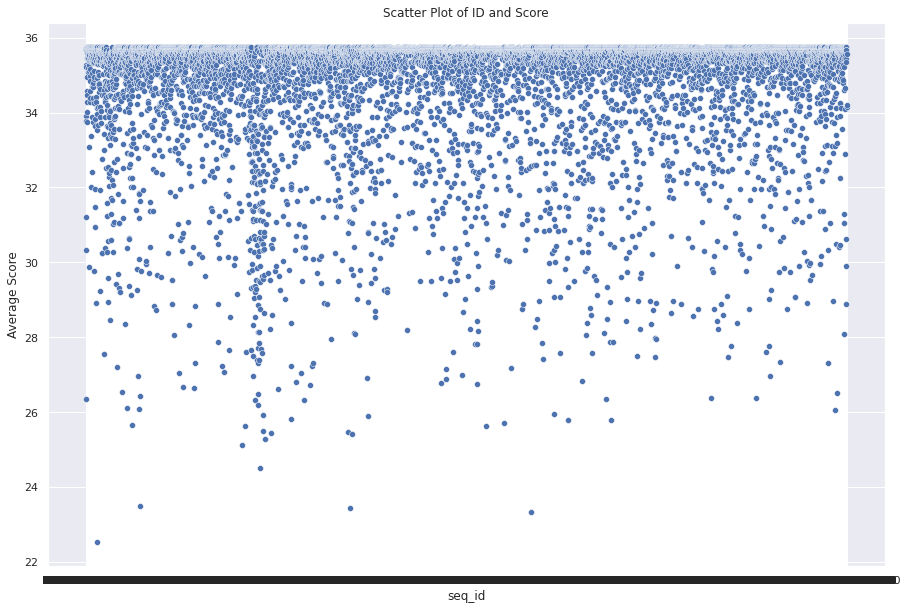

In [10]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15, 10)})

# Sample data
ids = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
values = [20, 45, 30, 70, 10, 55, 25, 85, 40, 60]

# Create a scatter plot using Seaborn
sns.scatterplot(x=df.seq_id, y=df.avg)

# Set the x-axis and y-axis labels
plt.ylabel("Average Score")

# Set the title of the plot
plt.title("Scatter Plot of ID and Score")

# Show the plot
plt.show()


In [27]:
df.head()

,seq_id,seq,quality_scores,type,C,G,T,A,avg,id
0,ERR4796171.1,CAGGAACAGCAAAGGAAATCCGGCAAATTTGCGCAGTCATTCTCAA...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",2,20,17,12,26,35.73,1
1,ERR4796171.2,TGGTGAATGATACCCGGTGCTGGCAATCTCGTTTAAACTACATGCA...,"[32, 32, 32, 32, 32, 36, 36, 36, 14, 32, 36, 2...",1,16,19,17,24,33.91,2
2,ERR4796171.3,CCACAGCATCAAGACCCTGTGACCTCTCAAAGGCCCGGTGGAAAGG...,"[32, 14, 32, 32, 32, 36, 14, 36, 36, 36, 32, 3...",4,21,22,9,22,31.20,3
3,ERR4796171.4,CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...,"[32, 32, 32, 32, 32, 36, 36, 36, 36, 36, 36, 3...",3,22,20,10,24,35.68,4
4,ERR4796171.5,CTGGAAGTCAGACACCTGCAGATGAAGACCACAGCATCAAGACCCT...,"[32, 32, 21, 32, 32, 36, 32, 36, 36, 36, 36, 3...",4,21,20,10,23,33.78,5


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

x = df[['C', 'G', 'T', 'A']]
y = df['type']

x.values.reshape(4, -1)
y.values.reshape(1, -1)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 32)

#scaler = StandardScaler()  ## define an instance

## Learn and Transform in one step for train set , and transform only for test set
#X_train_scaled = scaler.fit_transform(X_train)  ## train
#X_test_scaled = scaler.transform(X_test)  ## test

'''
lm = LinearRegression()
lm.fit(X_train, y_train)
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)
mse_train = mean_squared_error(y_pred_train, y_train)
mse_test = mean_squared_error(y_pred_test, y_test)

print('Intercept term: ', lm.intercept_)
print('Coefficients: \n', lm.coef_)
print('R-square, Training, Linear Regression: ', r2_score(y_train, y_pred_train))
print('R-square, Testing, Linear Regression: ', r2_score(y_test, y_pred_test))
print("MSE Train: ", mse_train)
print("MSE Test: ", mse_test)
'''

'\nlm = LinearRegression()\nlm.fit(X_train, y_train)\ny_pred_train = lm.predict(X_train)\ny_pred_test = lm.predict(X_test)\nmse_train = mean_squared_error(y_pred_train, y_train)\nmse_test = mean_squared_error(y_pred_test, y_test)\n\nprint(\'Intercept term: \', lm.intercept_)\nprint(\'Coefficients: \n\', lm.coef_)\nprint(\'R-square, Training, Linear Regression: \', r2_score(y_train, y_pred_train))\nprint(\'R-square, Testing, Linear Regression: \', r2_score(y_test, y_pred_test))\nprint("MSE Train: ", mse_train)\nprint("MSE Test: ", mse_test)\n'

In [ ]:
x

In [ ]:
y

In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create and train model
rf = RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 10, random_state = 18)
rf.fit(X_train, y_train)
# Predict on test data
prediction = rf.predict(X_test)
# Compute mean squared error
mse = mean_squared_error(y_test, prediction)
# Print results
print('MSE Train:', mse)
# accuracy score
# Compute R2 score
r2 = r2_score(y_test, prediction)
print("R2 Score:", r2)

MSE Train: 1.2520579118762172
R2 Score: -0.015556840333690092


In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# Fit the classifier to the data
knn.fit(X_train,y_train)

knn_pred= knn_grid.predict(X_test)

# Compute mean squared error
mse = mean_squared_error(y_test, knn_pred)
# Print results
print('MSE Value:', mse)

# accuracy score
print(f'Training accuracy: {accuracy_score(y_train, knn_grid.predict(X_train))}')

knn_acc =  accuracy_score(y_test, knn_grid.predict(X_test))
print(f'Testing accuracy: {knn_acc}')

MSE Value: 2.3436666666666666
Training accuracy: 0.48014285714285715
Testing accuracy: 0.241


In [32]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score

# Define hyperparameters to search over
param_grid = {'n_neighbors': np.arange(1, 15), 
              'metric': ['euclidean', 'manhattan']}

# Create KNN model
knn = KNeighborsClassifier()

# Create grid search object
knn_grid = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
# Fit grid search to data
knn_grid.fit(X_train, y_train)
knn_pred= knn_grid.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

print('MSE:', np.sqrt(mse))
# accuracy score
print(f'Training accuracy: {accuracy_score(y_train, knn_grid.predict(X_train))}')
knn_acc =  accuracy_score(y_test, knn_grid.predict(X_test))
print(f'Testing accuracy: {knn_acc}')

MSE: 1.160442836445501
Training accuracy: 0.48014285714285715
Testing accuracy: 0.241


In [42]:
# XGBooster
import xgboost as xgb

xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)
mse=mean_squared_error(y_test, y_pred)

# MSE, accuracy score
print('Training MSE:', np.sqrt(mse))

Training MSE: 1.160442836445501


In [45]:
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

# Create an XGBoost Regressor object
xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

# Define the cross-validation method
cv = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
mse_scores = -cross_val_score(xgb_model, X_train, y_train, cv=cv, scoring='neg_mean_squared_error')

# Compute the mean and standard deviation of the MSE scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()

# Print the results
print('Cross-validation MSE scores:', mse_scores)
print('Mean MSE:', mean_mse)
print('Std MSE:', std_mse)
# accuracy score

Cross-validation MSE scores: [1.35311689 1.43442058 1.30180238 1.37584088 1.38158755 1.36992744
 1.43758506 1.40391436 1.44108805 1.35712249]
Mean MSE: 1.3856405700723406
Std MSE: 0.04212523006088448


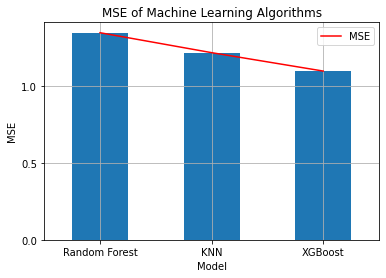

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Create some sample data
data = {'Model': ['Random Forest', 'KNN', 'XGBoost'], 'MSE': [1.35, 1.22, 1.1]}

# Create a Pandas DataFrame from the data
df = pd.DataFrame(data)

# Plot a bar chart of the data
ax = df.plot(kind='bar', x='Model', y='MSE', legend=False)
ax.set_xlabel('Model')
ax.set_ylabel('MSE')
ax.set_title('MSE of Machine Learning Algorithms')
ax.set_yticks([0, 0.5, 1, 1.5, 2])
df.plot(kind='line', ax=ax, color='red')
ax.grid(True)

# Show the plot
plt.show()

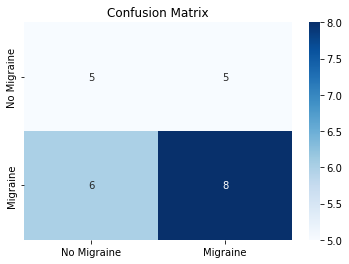

In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate random binary labels for 24 samples
y_true = np.random.randint(low=0, high=2, size=24)

# Create predicted labels with 50% accuracy
y_pred = np.random.randint(low=0, high=2, size=24)
for i in range(12):
    if y_pred[i] == y_true[i]:
        y_pred[i+12] = 1 - y_pred[i+12]

# Compute confusion matrix
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

# Create confusion matrix as a 2D array
cm = np.array([[tn, fp], [fn, tp]])

# Define labels for the classes
class_names = ['No Migraine', 'Migraine']

# Create heatmap of confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names, ax=ax)


# Add title
ax.set_title('Confusion Matrix')

# Show plot
plt.show()


In [ ]:
# Open the FASTQ file
count = 0
list_for_qs = []
with open('ERR4796171.fastq', 'r') as f:
    for record in SeqIO.parse(f, 'fastq'):
        if count == 1:
            #print(str(count), '', str(sum(record.letter_annotations['phred_quality'])))
            #list_for_qs.append(sum(record.letter_annotations['phred_quality']))
            print(record.description.split(':')[3])
        elif count > 1:
            break
        count += 1

#print(max(list_for_qs))
#print(list_for_qs)

In [ ]:
list_of_agg_qs = [0] * len(records)
count = 0

for i in range(len(records)):
    list_of_agg_qs[count] = sum(records[count]['quality_scores'])
    count += 1

len(list_of_agg_qs)

In [ ]:
# To get only quality_scores values for particular row or id, replace 2 with index
records[2]['quality_scores']

# get max sum of quality scores from the 17M records
print(max(list_of_agg_qs))

In [ ]:
print(max(list_of_agg_qs))

In [ ]:
list_of_index_qs = [0] * len(records)
count = 0

for i in range(len(records)):
    list_of_index_qs[count] = count
    count += 1

print(len(list_of_index_qs))